In [1]:
from collections import OrderedDict
import matplotlib.pyplot as plt

dir = 'working_space_output'
sinr_f='../{}/MmWaveSinrTime.txt'.format(dir)

all_plots_data = OrderedDict()

def proc_sinr(file, bias=0):
    with open(file, 'r') as f:
        raw = f.readlines()
    sinr2_t =[]
    sinr2_v =[]
    sinr3_t =[]
    sinr3_v =[]
    sinr4_t =[]
    sinr4_v =[]
    sinr6_t =[]
    sinr6_v =[]
    sinr7_t =[]
    sinr7_v =[]
    for r in raw:
        t = float(r.split(' ')[0])
        v = float(r.split(' ')[-1])
        cell_id = int(r.split(' ')[2])
        cell_id += bias
        if cell_id == 2:
            sinr2_t.append(t)
            sinr2_v.append(v)
        elif cell_id == 3:
            sinr3_t.append(t)
            sinr3_v.append(v)
        elif cell_id == 4:
            sinr4_t.append(t)
            sinr4_v.append(v)
        elif cell_id == 6:
            sinr6_t.append(t)
            sinr6_v.append(v)
        elif cell_id == 7:
            sinr7_t.append(t)
            sinr7_v.append(v)
    all_plots_data['sinr_2'] = (sinr2_t, sinr2_v)
    all_plots_data['sinr_3'] = (sinr3_t, sinr3_v)
    all_plots_data['sinr_4'] = (sinr4_t, sinr4_v)
    all_plots_data['sinr_6'] = (sinr6_t, sinr6_v)
    all_plots_data['sinr_7'] = (sinr7_t, sinr7_v)
proc_sinr(sinr_f)

def proc_cell(file):
    def shift(id):
        return id*10+30
    with open(file, 'r') as f:
        raw = f.readlines()
    def proc_cellset(cell_set):
        t = []
        c = []
        for r in raw:
            if int(r.split(' ')[1]) == cell_set:
                t.append(float(r.split(' ')[0]))
                c.append(shift(int(r.split(' ')[-1])))
        lt =[0.,]
        with open('../{}/CellIdStats.txt'.format(dir),'r') as f:
            r = f.readline()
            if cell_set != int(r.split(' ')[1]):
                r =f.readline()
            lc =[shift(int(r.split(' ')[-3])),]
        for i in range(len(t)):
            lt.append(t[i])
            lc.append(lc[-1])
            lt.append(t[i])
            lc.append(c[i])
        lt.append(12)
        lc.append(lc[-1])
        all_plots_data['sim_{}'.format(cell_set)] = (lt, lc)
    proc_cellset(1)
    proc_cellset(2)

proc_cell('../{}/CellIdStatsHandover.txt'.format(dir))

def proc_throughput(file):
    UNIT = 0.01
    with open(file, 'r') as f:
        raw = f.readlines()
    t_s = []
    for r in raw:
        if r.split('\t')[0] == 'DL':
            t_s.append(
                (float(r.split('\t')[1]), int(r.split('\t')[10]))
            )
    st = t_s[0][0]
    et = t_s[-1][0]
    t_s_iter = iter(t_s)
    tick = st
    tpt_t = []
    tpt_v = []
    moment = next(t_s_iter)
    while moment and tick < et :
        total_size_in_tick = 0
        tick_end = tick + UNIT
        while  moment and moment[0] <= tick_end:
            total_size_in_tick += moment[1]
            try:
                moment = next(t_s_iter)
            except:
                moment = None
        tpt_t.append((tick + tick_end) / 2)
        tpt_v.append(total_size_in_tick/UNIT)
        tick = tick_end
    all_plots_data['thput'] = (tpt_t, tpt_v)

proc_throughput('../{}/RxPacketTrace.txt'.format(dir))

    




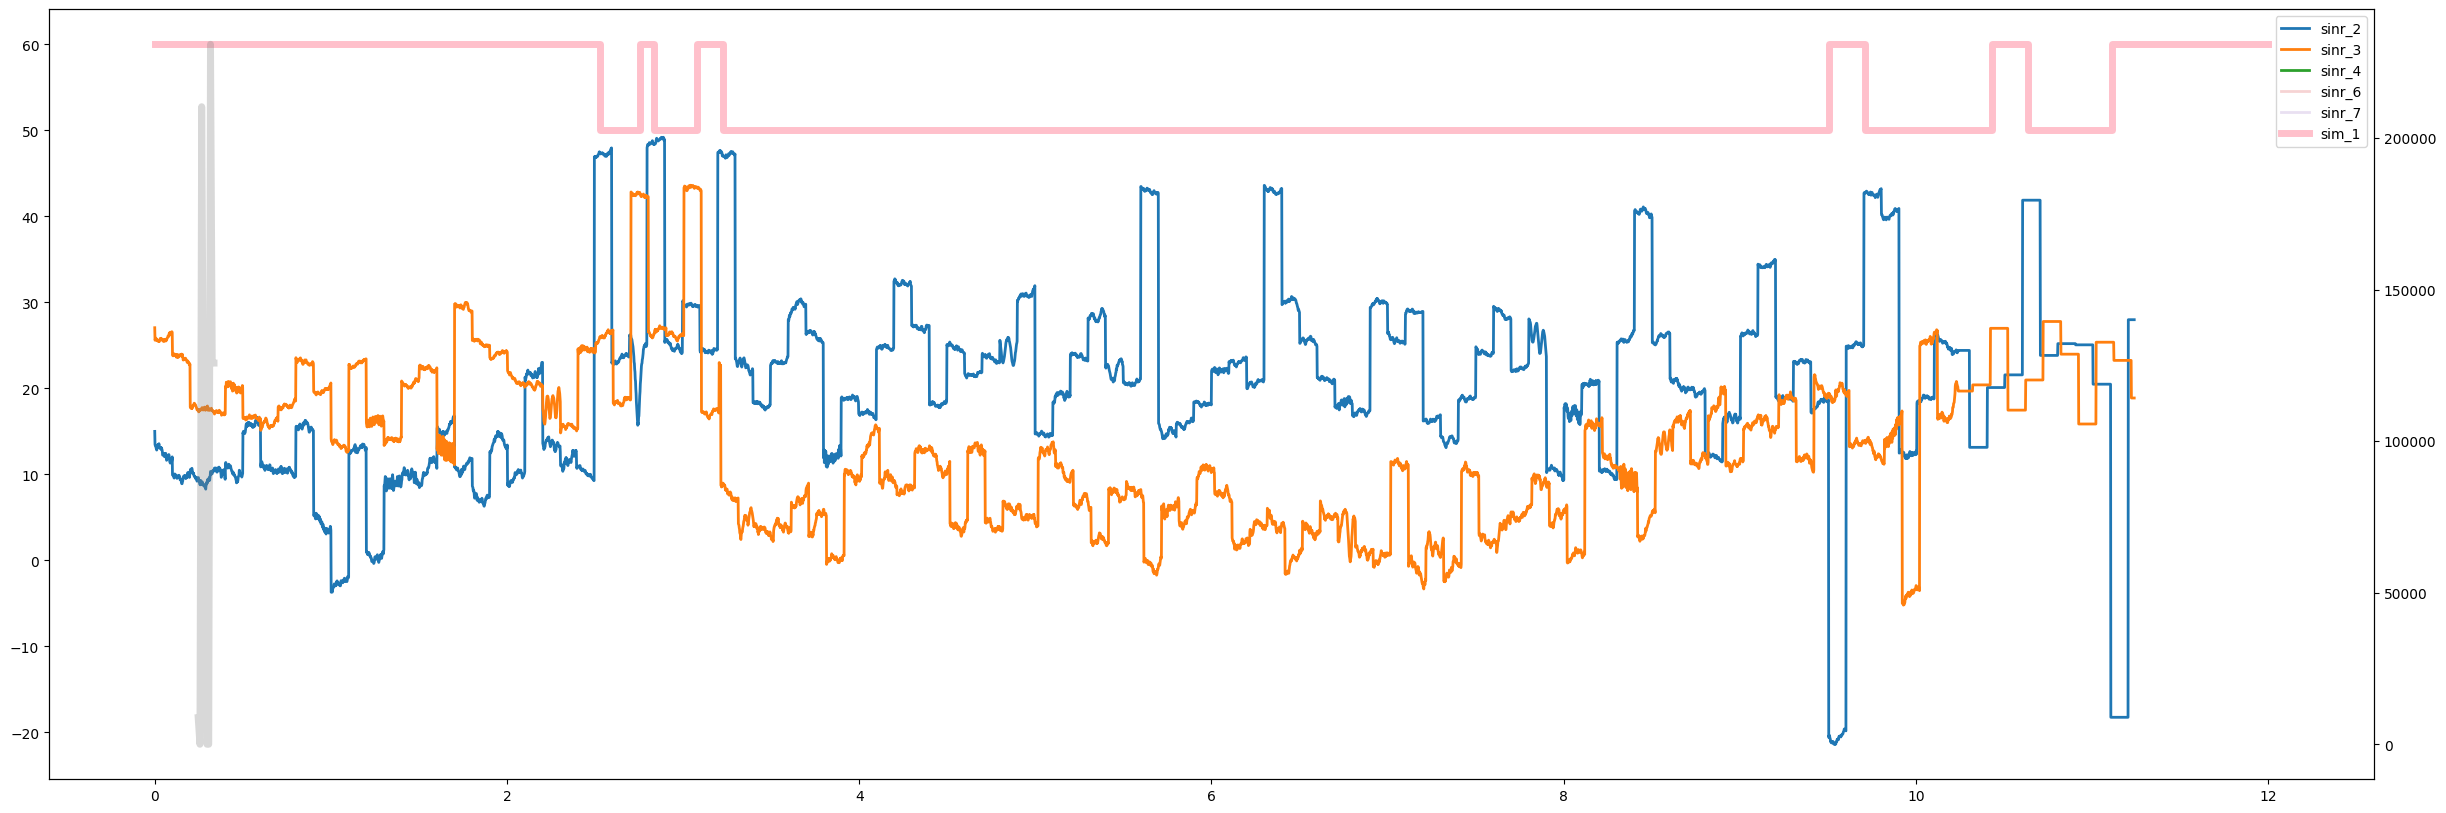

In [2]:
fig, ax = plt.subplots(figsize=(30, 10))
ax2 = ax.twinx()

group1_alpha = 1
group2_alpha = .2

for k,v in list(all_plots_data.items())[:3]:
    ax.plot(v[0], v[1],label=k,linewidth=2, alpha=group1_alpha)
for k,v in list(all_plots_data.items())[3:5]:
    ax.plot(v[0], v[1],label=k,linewidth=2, alpha=group2_alpha)
ax.plot(all_plots_data['sim_1'][0], all_plots_data['sim_1'][1], c='pink', linewidth=5, alpha = group1_alpha, label='sim_1')
# ax.plot(all_plots_data['sim_2'][0], all_plots_data['sim_2'][1], c='brown', linewidth=5, alpha = group2_alpha, label='sim_2')

ax.legend()
ax2.plot(all_plots_data['thput'][0], all_plots_data['thput'][1], c='grey', linewidth=5, alpha = .3, label='thput')

plt.show()
